In [1]:
from google.colab import files
uploaded = files.upload()

Saving weatherAUS.csv to weatherAUS.csv


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [3]:
# Load dataset
df = pd.read_csv('weatherAUS.csv')

# Drop columns with many missing values
df = df.drop(columns=['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm'])

# Drop rows with missing target
df = df.dropna(subset=['RainTomorrow'])

# Fill numeric missing values with mean
numeric_cols = df.select_dtypes(include=['float64']).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])


In [4]:
# Encode all object-type columns using LabelEncoder
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le


In [5]:
# Separate features and target
X = df.drop(columns=['RainTomorrow'])
y = df['RainTomorrow']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
# Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [13]:
# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8520341784169626
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91     22098
           1       0.75      0.50      0.60      6341

    accuracy                           0.85     28439
   macro avg       0.81      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439



In [7]:
joblib.dump(rf_model, 'rain_prediction_model.pkl')

# Save encoders (needed for consistent encoding during inference)
joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

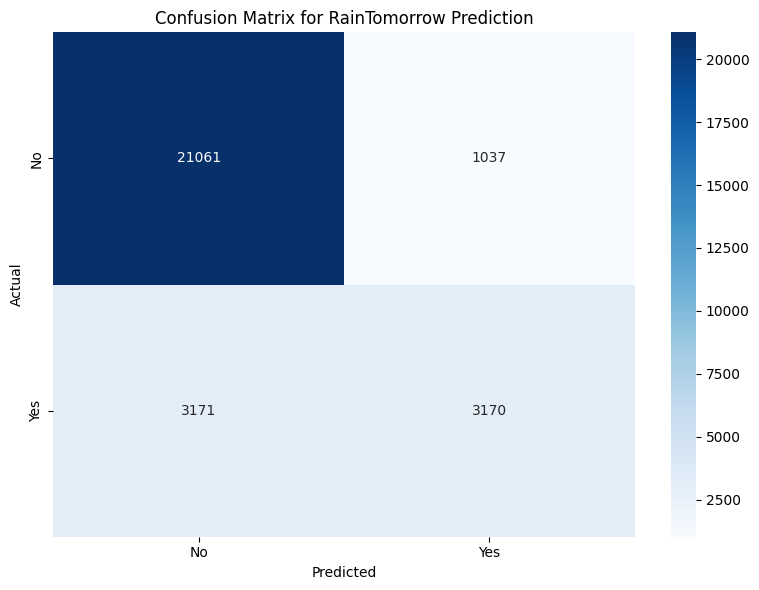

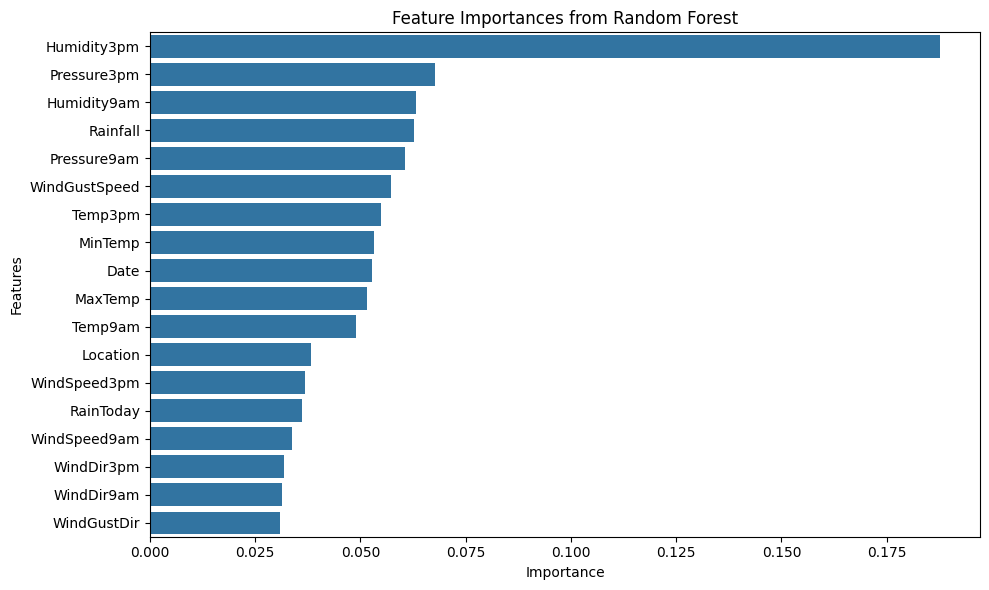

In [15]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for RainTomorrow Prediction')
plt.tight_layout()
plt.show()

# Feature Importance Graph
importances = rf.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]


plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importances from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()